## Overview
* 21卒ユーザー登録者数: 1248
* メールアドレス確認突破人数: 1227
* プロフィール登録突破人数: 1218

![](plot.png)

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import matplotlib.ticker as ticker

df = pd.read_csv('21卒学生リスト_2020_07_06-v3.csv')
df['resume_count'] = sum([df['skill_count'], df['training_count'], df['portfolio_count']])
df['active_count'] = sum([df['entry_count'], df['intern_count'], df['status_count']])
# df.created_at = pd.to_datetime(df.created_at, utc=True)
# df.index = pd.DatetimeIndex(df.created_at, name="created_at")
# df.index = df.index.tz_convert('Asia/Tokyo')


df.describe()

,public_id,entry_count,intern_count,training_count,status_count,portfolio_count,skill_count,resume_count,active_count
count,1.218000e+03,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000,1218.000000
mean,5.142857e+08,0.132184,0.122332,0.902299,0.107553,0.238095,1.107553,2.247947,0.362069
std,2.886650e+08,0.901801,0.541440,3.361947,0.391897,1.038674,2.753486,5.438165,1.353448
min,2.092820e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.679740e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.281007e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.688583e+08,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000
max,9.996008e+08,21.000000,8.000000,82.000000,3.000000,15.000000,41.000000,96.000000,23.000000


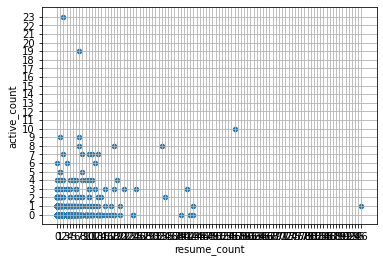

In [152]:
import numpy as np

x = df['resume_count']
y = df['active_count']

plt.scatter(x, y, 20)
plt.xlabel('resume_count')
plt.ylabel('active_count')

plt.xticks(np.arange(min(x), max(x)+1, 1))
plt.yticks(np.arange(min(y), max(y)+1, 1))


plt.grid(True)
plt.show()

In [153]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure 
output_notebook()


Loading BokehJS ...

In [155]:
p = figure(plot_width=600, plot_height=600)
p.circle(x=x, y=y, size=8)

p.line([2, 2], [-2, 20], color="red")
p.line([-10, 80], [1, 1], color="red")

p.line([8, 8], [-2, 20], color="red")
p.line([-10, 80], [3, 3], color="red")



show(p)

In [156]:
group_x = df.query('resume_count < 1 and active_count < 1')
group_x.to_csv('group_x.csv')
group_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 556 entries, 12 to 1214
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            556 non-null    object
 1   family_name      556 non-null    object
 2   first_name       556 non-null    object
 3   public_id        556 non-null    int64 
 4   last_sign_in_at  34 non-null     object
 5   entry            0 non-null      object
 6   entry_count      556 non-null    int64 
 7   intern           0 non-null      object
 8   intern_count     556 non-null    int64 
 9   training         0 non-null      object
 10  training_count   556 non-null    int64 
 11  contacts         0 non-null      object
 12  status           0 non-null      object
 13  status_count     556 non-null    int64 
 14  希望職種             415 non-null    object
 15  ポートフォリオ          0 non-null      object
 16  portfolio_count  556 non-null    int64 
 17  スキル              0 non-null      

In [147]:
group_y = df.query('resume_count < 1 and active_count > 0')
group_y.to_csv('group_y.csv')
group_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 78 to 1120
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            63 non-null     object
 1   family_name      63 non-null     object
 2   first_name       63 non-null     object
 3   public_id        63 non-null     int64 
 4   last_sign_in_at  0 non-null      object
 5   entry            8 non-null      object
 6   entry_count      63 non-null     int64 
 7   intern           37 non-null     object
 8   intern_count     63 non-null     int64 
 9   training         0 non-null      object
 10  training_count   63 non-null     int64 
 11  contacts         28 non-null     object
 12  status           28 non-null     object
 13  status_count     63 non-null     int64 
 14  希望職種             58 non-null     object
 15  ポートフォリオ          0 non-null      object
 16  portfolio_count  63 non-null     int64 
 17  スキル              0 non-null      o

In [148]:
group_z = df.query('resume_count > 0 and active_count < 1')
group_z.to_csv('group_z.csv')
group_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 1 to 1217
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            474 non-null    object
 1   family_name      474 non-null    object
 2   first_name       474 non-null    object
 3   public_id        474 non-null    int64 
 4   last_sign_in_at  65 non-null     object
 5   entry            0 non-null      object
 6   entry_count      474 non-null    int64 
 7   intern           0 non-null      object
 8   intern_count     474 non-null    int64 
 9   training         358 non-null    object
 10  training_count   474 non-null    int64 
 11  contacts         0 non-null      object
 12  status           0 non-null      object
 13  status_count     474 non-null    int64 
 14  希望職種             339 non-null    object
 15  ポートフォリオ          78 non-null     object
 16  portfolio_count  474 non-null    int64 
 17  スキル              219 non-null    o

In [149]:
group_t = df.query('resume_count > 0 and active_count > 0')
group_t.to_csv('group_t.csv')
group_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 1190
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   email            125 non-null    object
 1   family_name      125 non-null    object
 2   first_name       125 non-null    object
 3   public_id        125 non-null    int64 
 4   last_sign_in_at  32 non-null     object
 5   entry            48 non-null     object
 6   entry_count      125 non-null    int64 
 7   intern           59 non-null     object
 8   intern_count     125 non-null    int64 
 9   training         98 non-null     object
 10  training_count   125 non-null    int64 
 11  contacts         73 non-null     object
 12  status           73 non-null     object
 13  status_count     125 non-null    int64 
 14  希望職種             113 non-null    object
 15  ポートフォリオ          49 non-null     object
 16  portfolio_count  125 non-null    int64 
 17  スキル              77 non-null     o